## Linear functions

#### Function notation

The notation $ f: R^n → R $ means that $ f $ is a **function** that maps real $ n $-vectors to real numbers, i.e., it is a scalar-valued function of $ n $-vectors.

If $ x $ is an $ n $-vector, then $ f(x) $, which is a scalar, denotes the value of the function $ f $ at $ x $.

We can also interpret $ f $ as a function of n scalar arguments, the entries of the vector argument, in which case we write $ f(x) $ as
$$
f(x) = f(x_1, \ldots, x_n).
$$

> For example, we can define a function $ f: R^4 → R $ by
$$
f(x) = x_1 + x_2 - x_4^2
$$
for any $ 4 $-vector $ x $.

In [ ]:
import numpy as np
f = lambda x: x[0] + x[1] - x[3]**2
v = np.array([-1, 0, 1, 2])
f(v)

-5

#### The inner product function

Suppose $ a $ is an $ n $-vector. We can define a scalar-valued function $ f $ of $ n $-vectors, given by

$$
f(x) = a^T x = a_1 x_1 + \cdots + a_n x_n
$$
for any $ n $-vector $ x $.

We can also think of $ f $ as forming a _weighted sum_ of the elements of $ x $; the elements of $ a $ give the weights used in forming the weighted sum.

#### Superposition and linearity

Suppose $ x $ and $ y $ are $ n $-vectors and $ \alpha $ and $ \beta $ are scalars. For a function $ f $,

$$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$$

equation is called the **superposition** property.

A function that satisfies the superposition property is called **linear**.

> The inner product function $ f $ satisfies the property
$$
\begin{split}
f(\alpha x + \beta y) &= a^T (\alpha x + \beta y) \\
&= a^T (\alpha x) + a^T (\beta y) \\
&= \alpha (a^T x) + \beta (a^T y) \\
&= \alpha f(x) + \beta f(y).
\end{split}
$$

If a function $ f $ is linear, superposition extends to linear combinations of any number of vectors, and not just linear combinations of two vectors: We have

$$
f(\alpha_1 x_1 + \cdots + \alpha_k x_k) = \alpha_1 f(x_1) + \cdots + \alpha_k f(x_k),
$$

for any $ n $ vectors $ x_1, \ldots, x_k $, and any scalars $ \alpha_1, \ldots, \alpha_k $.

In [ ]:
a = np.array([-2,0,1,-3])

x = np.array([2,2,-1,1])
y = np.array([0,1,-1,0])

alpha = 1.5
beta = -3.7

LHS = np.inner(alpha * x + beta * y, a)
RHS = alpha * np.inner(x, a) + beta * np.inner(y, a)

print(LHS == RHS)

True


#### Inner product representation of a linear function

Suppose $ f $ is a scalar-valued function of $ n $-vectors, and is linear. Then there is a _unique_ $ n $-vector a such that $ f(x) = a^T x $ for all $ x $. We call $ a^T x $ the _inner product representation_ of $ f $.

##### Examples

- The **mean** or **average** value of an $ n $-vector is defined as
$$
f(x) = (x_1 + \cdots x_n) / n,
$$
and is denoted $ \textbf{avg}(x) $.

In [ ]:
avg = lambda x: sum(x)/len(x)

x = np.array([1, -3, 2, -1])

a = np.ones(len(x)) / len(x)

print(avg(x) == np.dot(a, x))
print(avg(x))
np.mean(x)

True
-0.25


-0.25

- The maximum element of an $ n $-vector $ x $,
$$
f(x) = \max \{x_1, \ldots, x_n \}
$$
is not a linear function (except when $ n = 1$).
We can show this by a counterexample for $ n = 2 $. Take $ x = (1, -1) $, $ y = (-1, 1) $, $ \alpha = 1 / 2 $, $ \beta = 1/2 $. Then
$$
f(\alpha x + \beta y) = 0 \ne \alpha f(x) + \beta f(y) = 1.
$$

In [ ]:
f = lambda x: np.max(x)

x = np.array([1, -1])
y = np.array([-1, 1])
alpha = beta = 1/2
print(f(alpha * x + beta * y) == alpha * f(x) + beta * f(y))
print(f(alpha * x + beta * y))
print(alpha * f(x) + beta * f(y))

False
0.0
1.0


#### Affine functions

A linear function plus a constant is called an affine function.

A function $ f: R^n → R $ is affine if and only if it can be expressed as $ f(x) = a^T x + b $ for some $ n $-vector $ a $ and scalar $ b $, which is sometimes called the **offset** (or **bias**).

> For example, the function on $ 3 $-vectors defined by
$$
f(x) = 2.3 - 2 x_1 + 1.3 x_2 - x_3,
$$
is affine, with $ b = 2.3 $, $ a = (-2, 1.3, -1) $.

Any affine scalar-valued function satisfies the following variation on the super-position property:
$$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$$
for all $ n $-vectors $ x $, $ y $, and all scalars $ \alpha $, $ \beta $ that satisfy $ \alpha + \beta = 1 $.

For linear functions, superposition holds for any coefficients $ \alpha $ and $ \beta $; for affine functions, it holds when the coefficients sum to one (i.e., when the argument is an affine combination).

> To see that the restricted superposition property holds for an affine function $ f = a^T x + b $, we note that, for any vectors $ x $, $ y $ and scalars $ \alpha $ and $ \beta $ that satisfy $ \alpha + \beta = 1 $,
$$
\begin{split}
f(\alpha x + \beta y) &= a^T (\alpha x + \beta y) + b \\
&= \alpha a^T x + \beta a^T y + (\alpha + \beta) b \\
&= \alpha (a^T x + b) + \beta (a^T y + b) \\
&= \alpha f(x) + \beta f(x).
\end{split}
$$

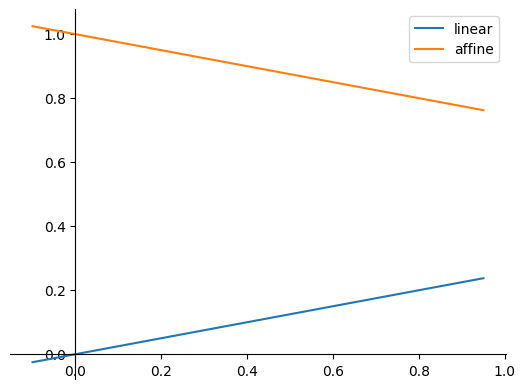

In [ ]:
f = lambda x: (1 / 4) * x
g = lambda x: 1 - (1 / 4) * x

import matplotlib.pyplot as plt

x = np.arange(-0.1, 1, 0.05)

fig, ax = plt.subplots()

ax.plot(x, f(x), label='linear')
ax.plot(x, g(x), label='affine')
ax.legend(loc='best')

ax.spines['left'].set_position('zero')

ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['bottom'].set_position('zero')

ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

In [ ]:
plt.close(fig)

###### A civil engineering example

Consider a steel structure like a bridge, and let $ w $ be an $ n $-vector that gives the weight of the load on the bridge in $ n $ specific locations, in metric tons. These loads will cause the bridge to deform (move and change shape) slightly. Let $ s $ denote the distance that a specific point on the bridge sags, in millimeters, due to the load $ w $.

<p align="center">
<img src="https://drive.google.com/uc?id=1VEEfuU6TbTs8C_ZbOyJQm4NeacCg1ECE" width="400">
</p>

For weights the bridge is designed to handle, the sag is very well approximated as a linear function $ s = f (x) $. This function can be expressed as an inner product, $ s = c^T w $, for some $ n $-vector $ c $. From the equation $ s = c_1 w_1 + \cdots + c_n w_n $, we see that $ c_1 w_1 $ is the amount of the sag that is due to the weight $ w_1 $, and similarly for the other weights. The coefficients $ c_i $, which have units of mm/ton, are called compliances, and give the sensitivity of the sag with respect to loads applied at the $ n $ locations.

> For example the following table shows the results of the experiments when building such bridge. With the first three rows, we could get the values of the coefficient vector $ c $.

| $ w_1 $ | $ w_2 $ | $ w_3 $ | Measured sag | Predicted sag |
|:-------:|:-------:|:-------:|:------------:|:-------------:|
| 1       | 0       | 0       | 0.12         | ---           |
| 0       | 1       | 0       | 0.31         | ---           |
| 0       | 0       | 1       | 0.26         | ---           |
| 0.5     | 1.1     | 0.3     | 0.481        | 0.479         |
| 1.5     | 0.8     | 1.2     | 0.736        | 0.740         |

In [ ]:
W = np.eye(3)
s = np.array([0.12, 0.31, 0.26])

c = np.linalg.solve(W, s)
print(c)
W1 = np.array([0.5, 1.1, 0.3])
print('predicted sag:', np.dot(c, W1))

W2 = np.array([1.5, 0.8, 1.2])
print('predicted sag:', np.dot(c, W2))

[0.12 0.31 0.26]
predicted sag: 0.47900000000000004
predicted sag: 0.74


## Taylor approximation

In many applications, scalar-valued functions of $ n $ variables, or relations between $ n $ variables and a scalar one, can be _approximated_ as linear or affine functions. In these cases we sometimes refer to the linear or affine function relating the variables and the scalar variable as a _model_, to remind us that the relation is only an approximation, and not exact.

Suppose that $ f:\mathbb{R}^n → \mathbb{R} $ is differentiable, which means that its partial derivatives exist. Let $ z $ be an $ n $-vector. The (first-order) Taylor approximation of $ f $ near (or at) the point $ z $ is the function $ \hat{f}(x) $ of $ x $ defined as
$$
\hat{f}(x) = f(z) + \frac{\partial f}{\partial x_1}(z)(x_1 - z_1) + \cdots + \frac{\partial f}{\partial x_n}(z)(x_n - z_n)
$$
where $ \frac{\partial f}{\partial x_i}(z) $ denotes the partial derivative of $ f $ with respect to its $ i $th argument, evaluated at the $ n $-vector $ z $.

Evidently $ \hat{f} $ is an affine function of $ x $. (It is sometimes called the _linear approximation_ of $ f $ near $ z $, even though it is in general affine, and not linear.) It can be written compactly using inner product notation as
$$
\hat{f}(x) = f(z) + \nabla f(z)^T (x - z),
$$
where $ \nabla f(z) $ is an $ n $-vector, the gradient of $ f $ (at the point $ z $),
$$
\nabla f(z) = \begin{bmatrix}
\frac{\partial f}{\partial x_1}(z)\\
\vdots \\
\frac{\partial f}{\partial x_n}(z)
\end{bmatrix}.
$$

In [ ]:
f = lambda x: x[0] + np.exp(x[1] - x[0])
grad_f = lambda z: np.array([1 - np.exp(z[1] - z[0]), np.exp(z[1]- z[0])])
z = np.array([1,2])

# Taylor approximation
f_hat = lambda x: f(z) + grad_f(z) @ (x - z)
f([1,2]), f_hat([1,2])

(3.718281828459045, 3.718281828459045)

- [ ] **Code Excersise:** Write the code for $ n $-dimesional version of linear Taylor approximation.

## Regression model

In this section we describe a very commonly used affine function, especially when the $n$-vector $x$ represents a feature vector. The affine function of $x$ given by
$$
\hat{y}=x^T \beta+v,
$$
where $\beta$ is an $n$-vector and $v$ is a scalar, is called a *regression model*. In this context, the entries of $x$ are called the *regressors*, and $\hat{y}$ is called the *prediction*, since the regression model is typically an approximation or prediction of some true value $y$, which is called the *dependent variable*, *outcome*, or *label*.

The vector $\beta$ is called the *weight vector* or *coefficient vector*, and the scalar $v$ is called the *offset* or *intercept* in the regression model. Together, $\beta$ and $v$ are called the *parameters* in the regression model. (We will see in chapter 13 how the parameters in a regression model can be estimated or guessed, based on some past or known observations of the feature vector $x$ and the associated outcome $y$.) The symbol $\hat{y}$ is used in the regression model to emphasize that it is an *estimate* or *prediction* of some outcome $y$.

#### Simplified regression model notation

Vector stacking can be used to lump the weights and offset in the regression model into a single parameter vector, which simplifies the regression model notation a bit. We create a new regressor vector $\tilde{x}$, with $n+1$ entries, as $\tilde{x}=(1, x)$. We can think of $\tilde{x}$ as a new feature vector, consisting of all $n$ original features, and one new feature added $\left(\tilde{x}_1\right)$ at the beginning, which always has the value one. We define the parameter vector $\tilde{\beta}=(v, \beta)$, so the regression model $(2.7)$ has the simple inner product form
$$
\hat{y}=x^T \beta+v=\left[\begin{array}{l}
1 \\
x
\end{array}\right]^T\left[\begin{array}{l}
v \\
\beta
\end{array}\right]=\tilde{x}^T \tilde{\beta}.
$$

Often we omit the tildes, and simply write this as $\hat{y}=x^T \beta$, where we assume that the first feature in $x$ is the constant $1$. A feature that always has the value $1$ is not particularly informative or interesting, but it does simplify the notation in a regression model.

#### House price regression model.
> As a simple example of a regression model, suppose that $y$ is the selling price of a house in some neighborhood, over some time period, and the 2-vector $x$ contains attributes of the house:
- $x_1$ is the house area (in 1000 square feet),
- $x_2$ is the number of bedrooms.
If $y$ represents the selling price of the house, in thousands of dollars, the regression model
$$
\hat{y}=x^T \beta+v=\beta_1 x_1+\beta_2 x_2+v
$$
predicts the price in terms of the attributes or features. This regression model is not meant to describe an exact relationship between the house attributes and its selling price; it is a model or approximation. Indeed, we would expect such a model to give, at best, only a crude approximation of selling price.
As a specific numerical example, consider the regression model parameters
$$
\beta=(148.73,-18.85), \quad v=54.40 .
$$
These parameter values were found using the methods we will see in chapter 13 , based on records of sales for 774 houses in the Sacramento area. Table 2.3 shows the feature vectors $x$ for five houses that sold during the period, the actual sale price $y$, and the predicted price $\hat{y}$ from the regression model above. Figure 2.4 shows the predicted and actual sale prices for 774 houses, including the five houses in the table, on a scatter plot, with actual price on the horizontal axis and predicted price on the vertical axis.

In [ ]:
import pickle
import os

path = '/content/drive/MyDrive/Colab Notebooks/house_prices.pkl'

with open(path, 'rb') as f:
    loaded_dict = pickle.load(f)

# print(loaded_dict)
# print(loaded_dict.keys())/

price = loaded_dict["price"]
area = loaded_dict["area"]
beds = loaded_dict["beds"]

v = 54.4017
beta = [147.7251, -18.8534]

y_hat = np.array([beta[0] * area + beta[1] * beds]) + v
y_hat

array([[155.7042191, 167.1344646, 132.1236159, 188.2591539, 148.521102 ,
        167.6699522, 184.2151634, 141.3748844, 134.1363545, 103.5572588,
        198.1567356, 162.9981618, 175.3147579, 162.167224 , 234.3493851,
        130.9418151, 158.5664088, 140.1007713, 163.1458869, 182.848738 ,
        182.2024248, 170.1812789, 168.0208152, 201.702138 , 162.7027116,
        170.1812789, 207.3156918, 157.6800582, 196.4394472, 148.2810646,
        147.819376 , 209.3284304, 176.1456957, 153.8392056, 170.7721793,
        213.4278337, 144.440212 , 212.393758 , 267.7906705, 223.6208656,
        216.0314727, 173.3389188, 213.871009 , 213.9633213, 232.1889214,
        172.8957435, 205.5429906, 170.9753172, 168.0208152, 252.4272601,
        177.3274965, 164.770863 , 215.7914353, 216.3269229, 207.611142 ,
        186.929628 , 232.1335086, 199.0430862, 184.8614766, 232.3366465,
        266.701182 , 136.1121936, 221.0541261, 213.871009 , 214.7573596,
        214.7942591, 275.6755136, 217.7118616, 216.

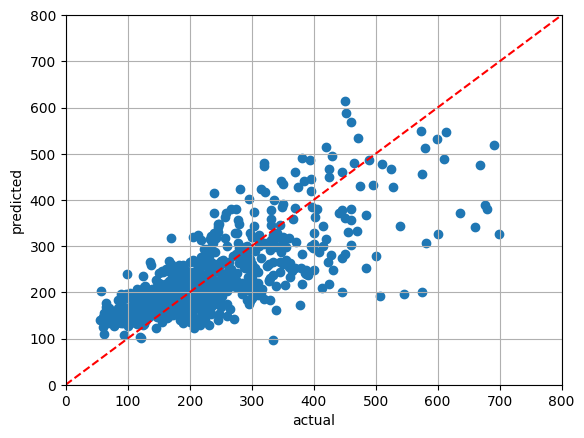

In [ ]:
import matplotlib.pyplot as plt
fig, _ = plt.subplots()
plt.scatter(price, y_hat)
plt.plot([0, 800], [0, 800], linestyle='dashed', color='red')
plt.xlabel("actual")
plt.xlim(0, 800)
plt.ylabel("predicted")
plt.ylim(0, 800)
plt.grid(True)

In [ ]:
plt.close(fig)